# EXPLORATORY DATA ANALYST 
<p> Notre dataset est relative  à l'octroi ou non de credit bancaire à certains habitants de Germany</p>
<h4> l'objectif  est de prédire le caractère bon ou mauvais d'octroi de crédit bancaire à une personne à travers un model de machine learning </h4>

## COMPREHENSION GENERALE DES DONNEES 
<ul> 
<li> *Age* (int) </li>
<li> *Sexe* : string ( male & femal)</li>
<li>*Job* : int ( 0:non qualifié et non résident , 1:non qualifié et résident, 2: qualifié , 3: hautement qualifié) </li>
<li>*Housing*:string( own  rent  free ) </li>
<li>*Saving accounts ( Compte epargne )*: string (little , moderate , quit rich, rich )</li>
<li>*Checking account (compte courant)* : string (little , moderate , rich )</li>
<li>*Credit amount*:int (Montant de crédit)<li>
<li>*Duration*: int (durée en mois)<li>
<li>*Purpose *:string (ça rensigne le but pour lequel l'individu demande un pret au près de la banque)<li>
<li>*Risk* : string (ça renseigne l'etat d'octroi du crédit)<li>
</ul>

## ANALYSE DE FORME 
<ul>
    <li> La variable target est : Risk </li>
    <li> les dimension du dataset : (1000x10)</li>
    <li> 4 variables quantitatives et 6 variables qualitatives</li>
    <li> on remarque qu'il y a de donnees manquantes dans les variables *Checking account soit 39,4%* et *Saving account soit 18,3%* </li>
    <li>Pas de doublons dans le dataset</li>
    <li> Une faible correlation entre la target et Purpose (6%) Job(3%) Housing(2%) </li>
<ul>

## ANALYSE DE FOND
<ul>
    <li> l'histogramme de la variables *job* montre une distribution normale repeté avec des saut important. If faut retenir que notre variables *job* a été préalablement standardiser , donc c'etais une variable qualitative </li>
    <li> beaucoup de valeur abérante dans la variables *Credit amount* </li>
    
</ul>






In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

data =pd.read_csv("D:/recuperation/Nouveau dossier/programmation/german_credit_data_1.csv")
data_copy=data.copy()
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


## Analyse de forme

In [ ]:
#suppression de la colonne "Unnamed"
data_copy.drop("Unnamed: 0",inplace=True,axis=1)

In [3]:
#les dimension du dataset
data_copy.shape

(1000, 10)

In [15]:
#recherche des type de variables
data_copy.dtypes.value_counts()

object    6
int64     4
dtype: int64

In [33]:
data_copy.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [16]:
#recherche des données a faible pourcentage de valeurs manquantes
data_copy.isnull().sum()/data_copy.shape[0]

Age                 0.000
Sex                 0.000
Job                 0.000
Housing             0.000
Saving accounts     0.183
Checking account    0.394
Credit amount       0.000
Duration            0.000
Purpose             0.000
Risk                0.000
dtype: float64

In [18]:
#recherche de doublon dans les donnees
data_copy.duplicated().value_counts()

False    1000
dtype: int64

In [31]:
#recherche des types de category pour les variables qualitative
for col in data_copy.select_dtypes("object"):
    print(f"{col:-<50}:{data_copy[col].unique()} ")

Sex-----------------------------------------------:['male' 'female'] 
Housing-------------------------------------------:['own' 'free' 'rent'] 
Saving accounts-----------------------------------:[nan 'little' 'quite rich' 'rich' 'moderate'] 
Checking account----------------------------------:['little' 'moderate' nan 'rich'] 
Purpose-------------------------------------------:['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others'] 
Risk----------------------------------------------:['good' 'bad'] 


In [32]:
#extraction de donnees ( target , listes des  variables qualitatives et variables quantitatives)
Objectif = data_copy["Risk"]
var_qual=data_copy.drop("Risk",axis=1).select_dtypes("object")
var_quant=data_copy.select_dtypes("int64")


## Analyse de fond

In [ ]:
#encodage des variables qualitatives pour pouvoir visualiser la matrice de correlation 
from sklearn.preprocessing import LabelEncoder
df=data_copy.copy()
encode=LabelEncoder()
for col in data_copy.select_dtypes("object"):
    df[f'{col}_encod']=encode.fit_transform(data_copy[col])
    df.drop(col,inplace=True,axis=1)
df.head()
    



,Age,Job,Credit amount,Duration,Sex_encod,Housing_encod,Saving accounts_encod,Checking account_encod,Purpose_encod,Risk_encod
0,67,2,1169,6,1,1,4,0,5,1
1,22,2,5951,48,0,1,0,1,5,0
2,49,1,2096,12,1,1,0,3,3,1
3,45,2,7882,42,1,0,0,0,4,1
4,53,2,4870,24,1,0,0,0,1,0


<Axes: >

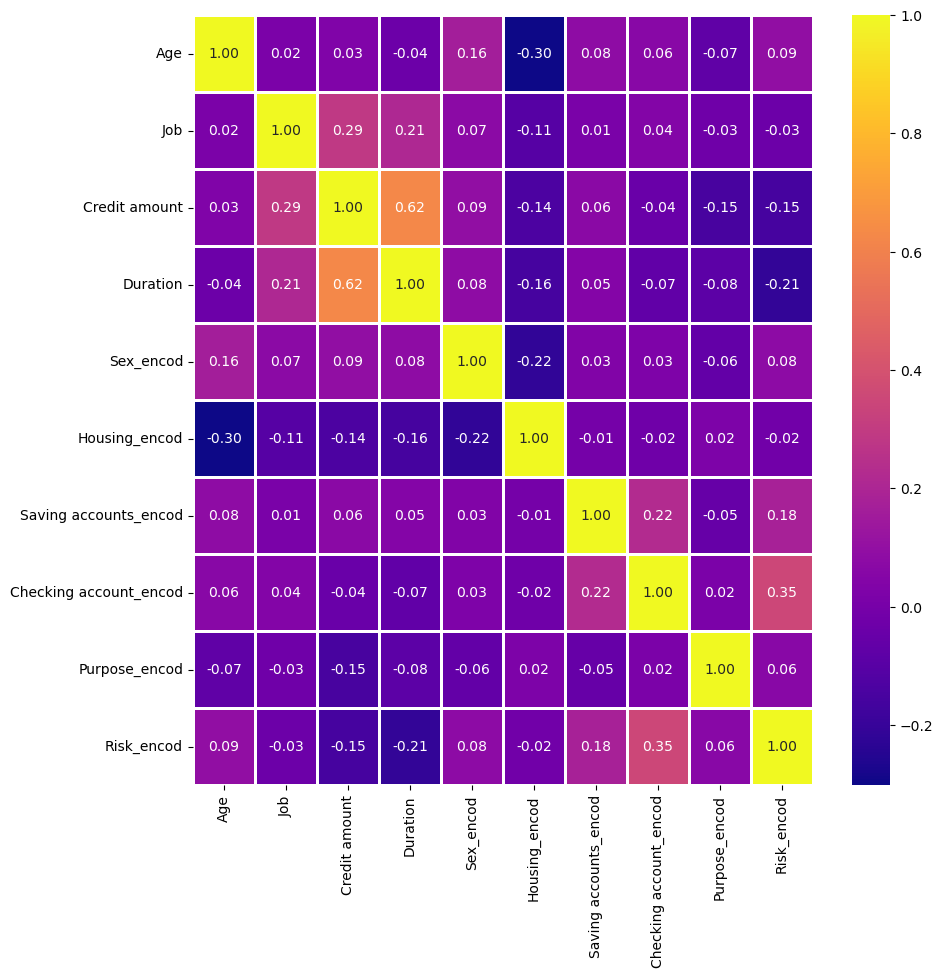

In [47]:
#la matrice de correlation entres les variables
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=2, fmt='.2f',cmap='plasma')

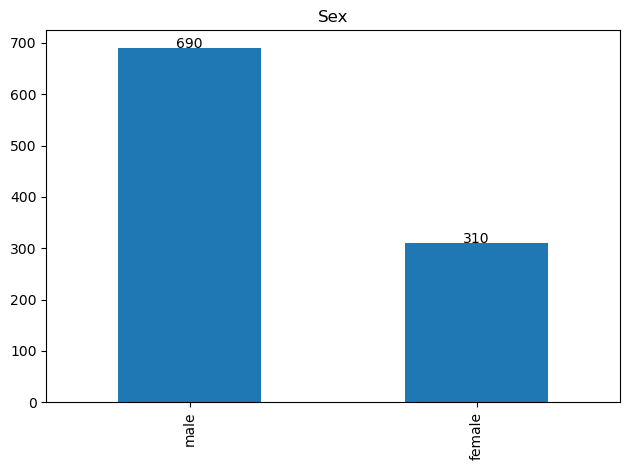

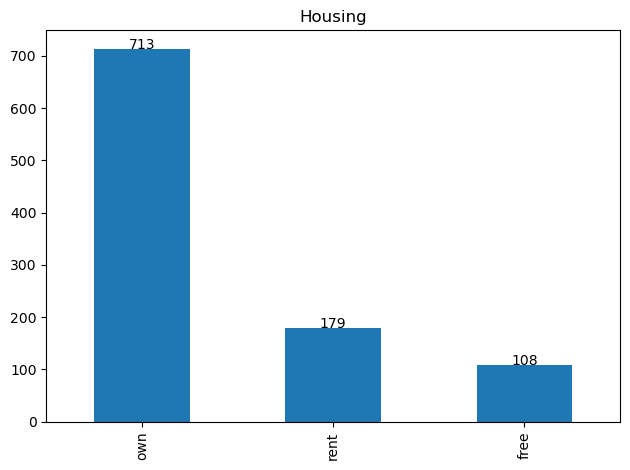

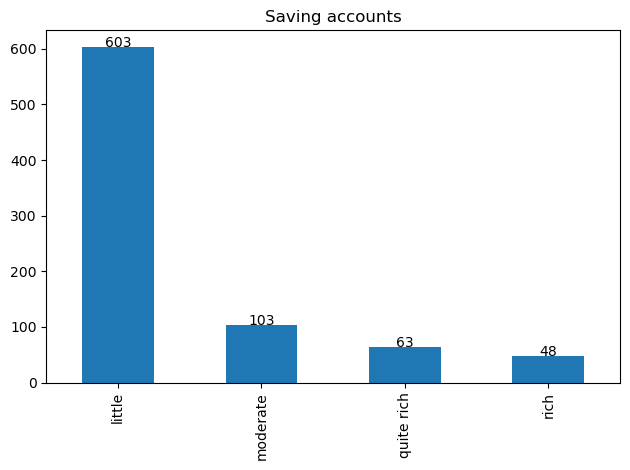

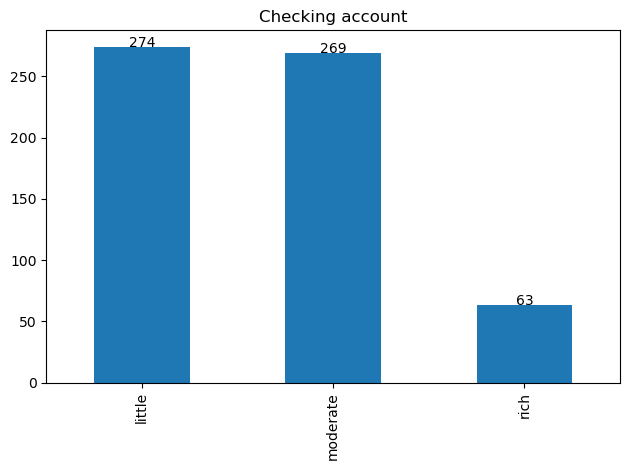

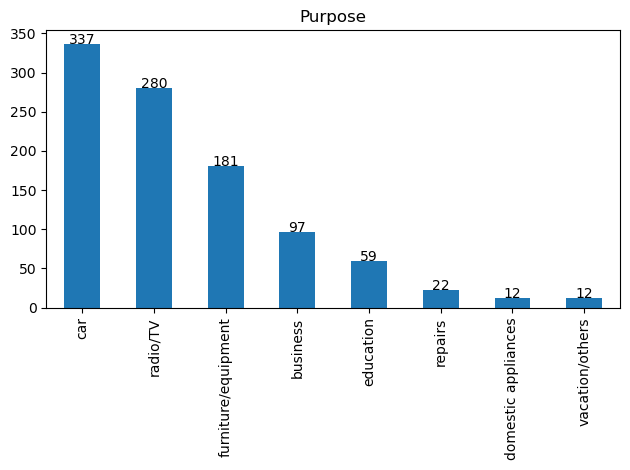

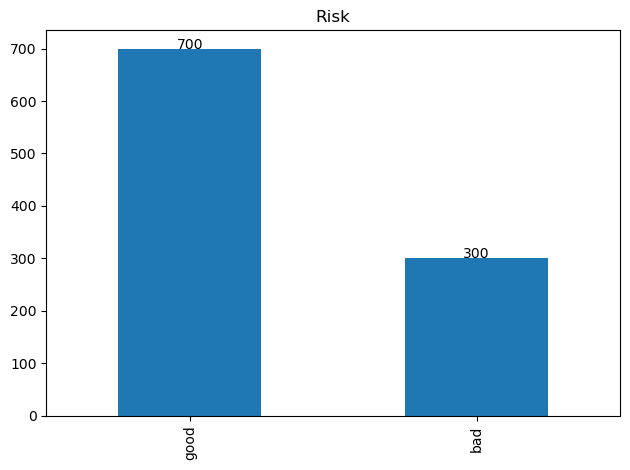

In [62]:
#visulisation des variables qualitatitive (barplot)
for col in data_copy.select_dtypes("object"):
    plt.figure()
    plt.title(col)
    fig=data_copy[col].value_counts().plot.bar()
    for i,val in enumerate(data_copy[col].value_counts()):
        fig.text(i,val,str(val),ha="center")
    plt.tight_layout()
    plt.show()


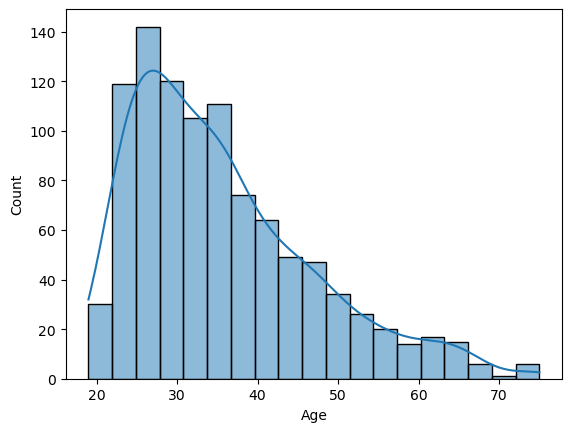

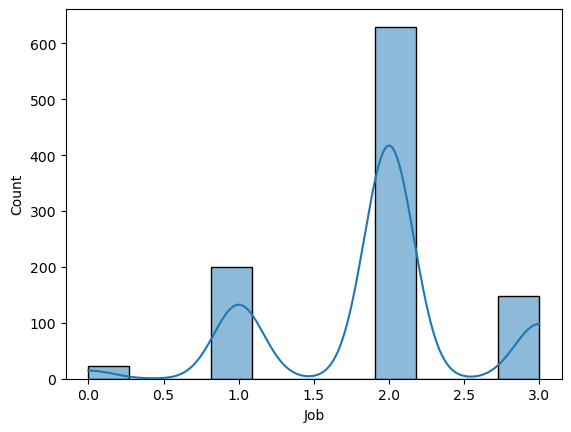

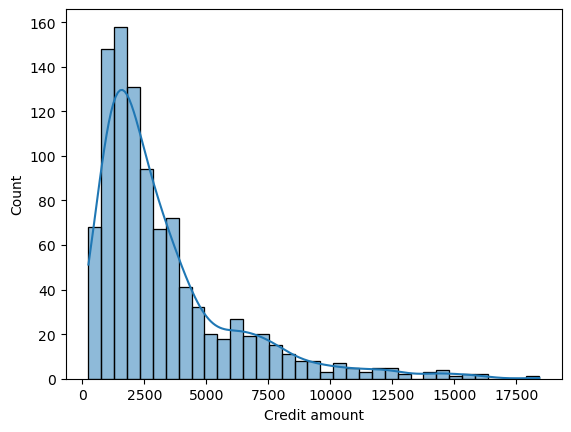

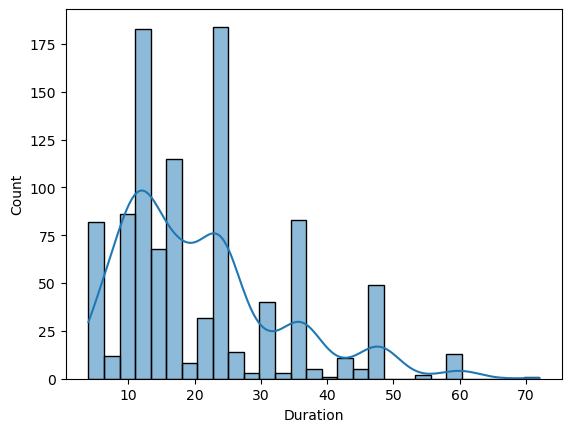

In [57]:
#visualisation des variables quantitatives
for col in data_copy.select_dtypes("int64"):
    plt.figure()
    sns.histplot(data=data_copy, x=col, kde=True)
    plt.show()

    
    

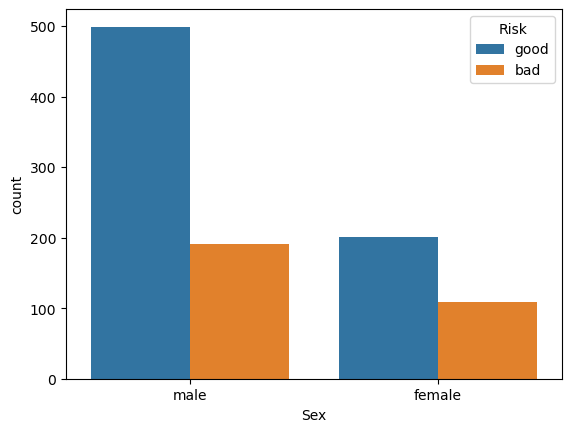

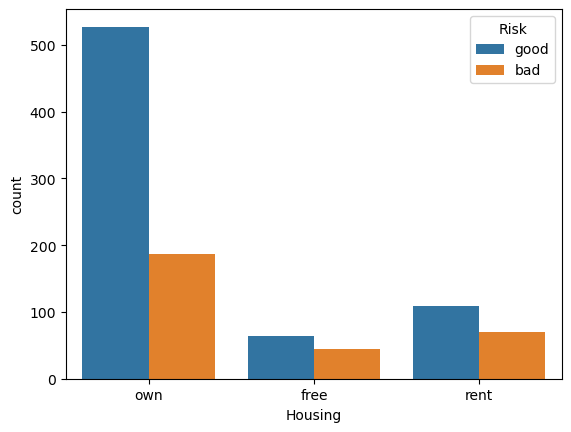

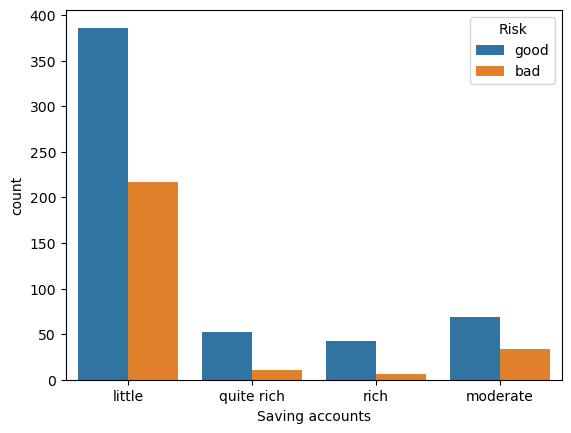

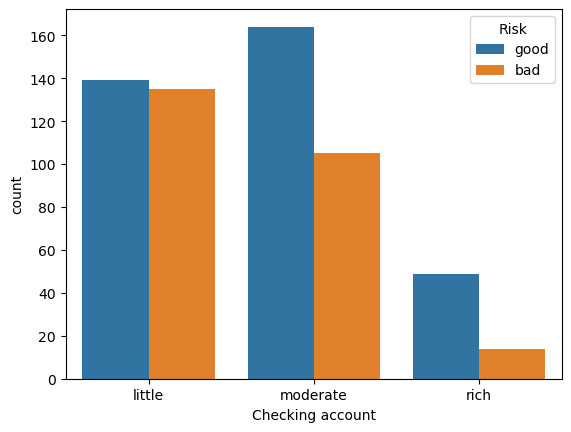

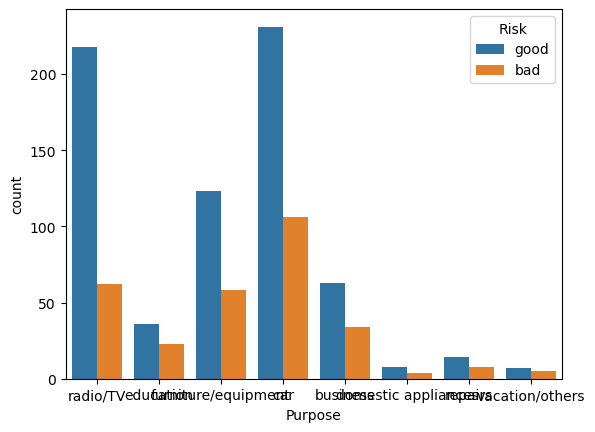

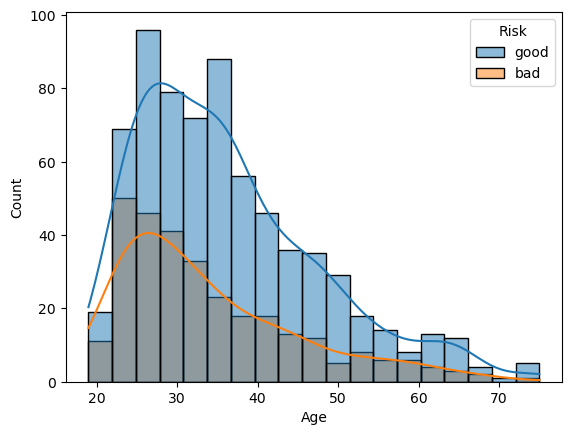

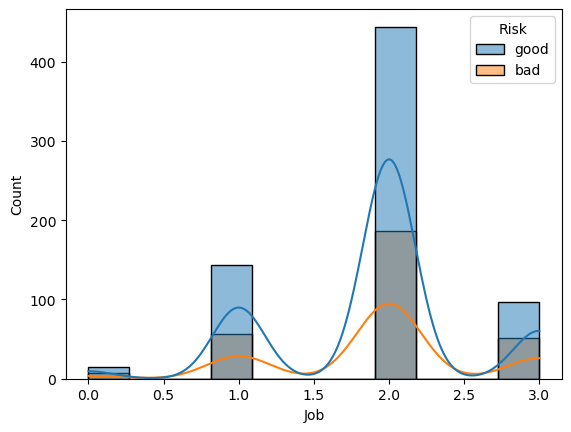

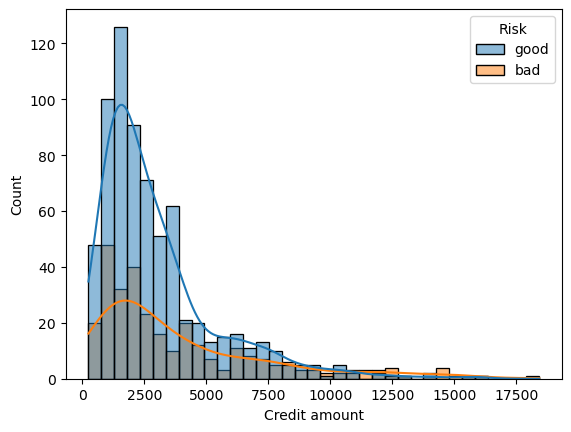

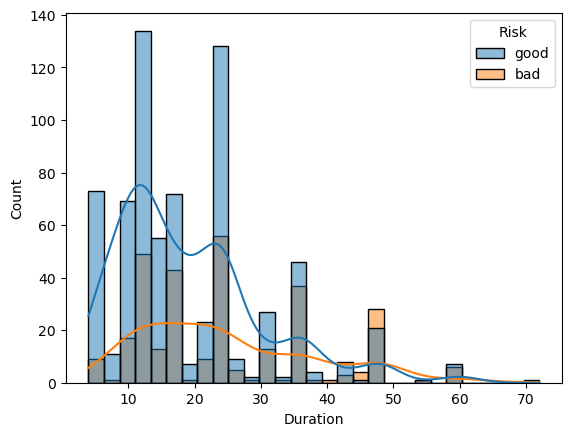

In [64]:
#Visualisation  relative à features et target

## relation var_qual et target ( countplot )
for col  in var_qual:
    plt.figure()
    sns.countplot(x=col ,data=data,hue='Risk')
    plt.show()

##relation entre var_quant et target ()
for col in var_quant:
    plt.figure()
    sns.histplot(data=data,x=col,kde=True, hue="Risk")
    plt.show()


In [74]:
var_quant

,Age,Job,Credit amount,Duration
0,67,2,1169,6
1,22,2,5951,48
2,49,1,2096,12
3,45,2,7882,42
4,53,2,4870,24
...,...,...,...,...
995,31,1,1736,12
996,40,3,3857,30
997,38,2,804,12
998,23,2,1845,45


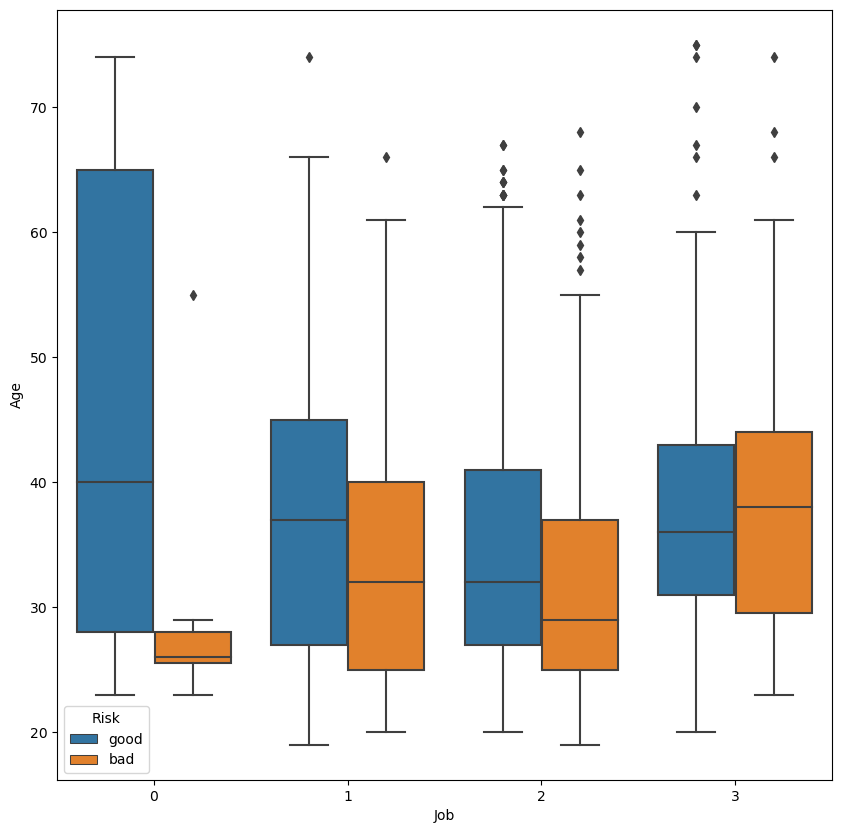

In [81]:
#visualisons la relation entre job et l'age en foction du type de risque

plt.figure(figsize=(10,10))
sns.boxplot(data=data_copy,x="Job",y="Age",hue="Risk")
plt.show()

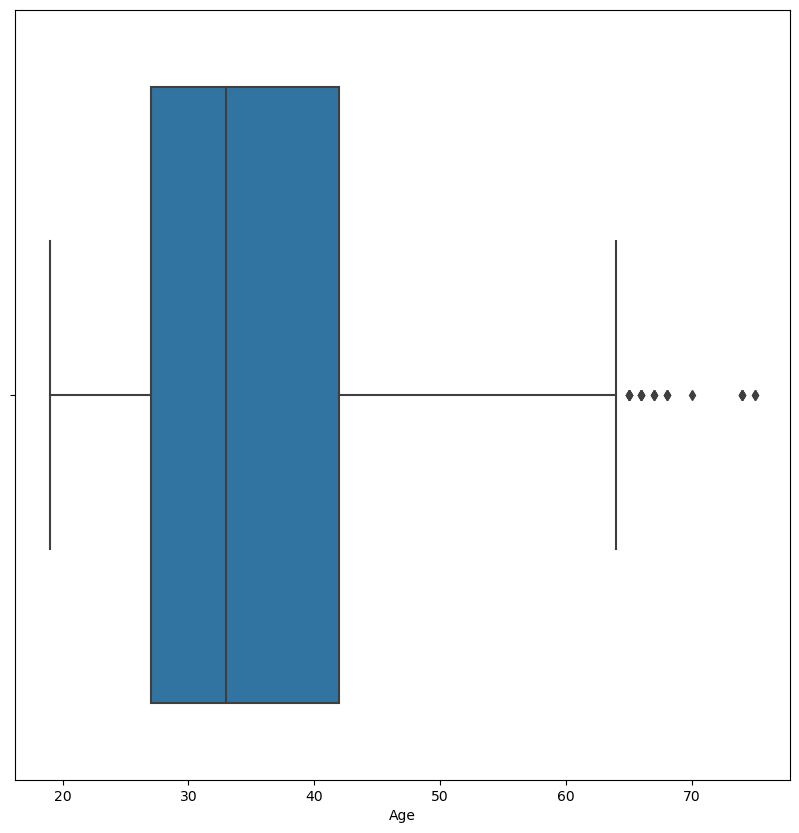

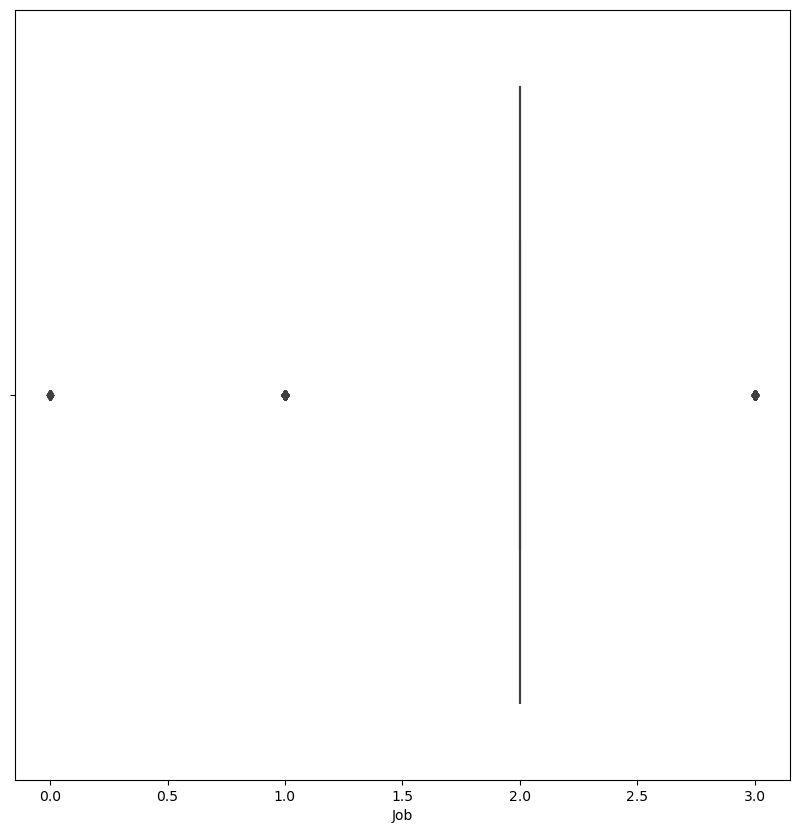

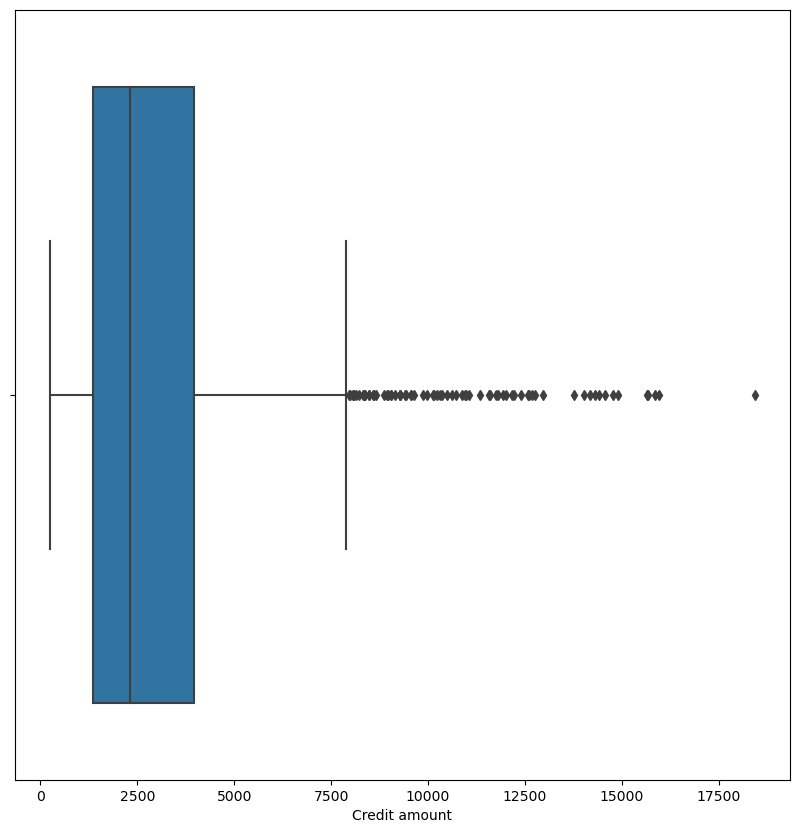

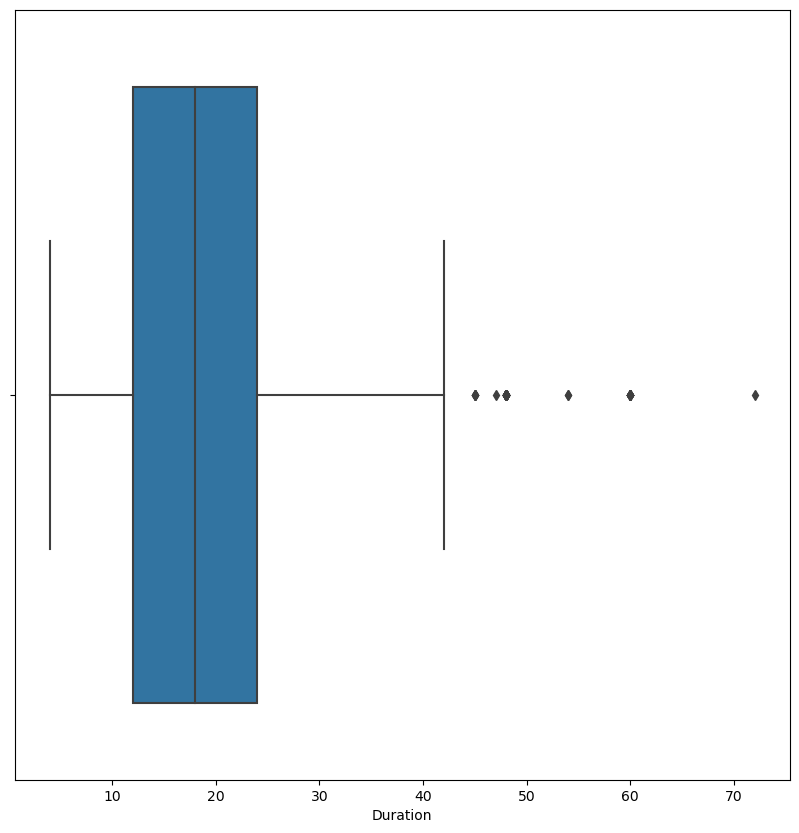

In [87]:
for col in var_quant:
    plt.figure(figsize=(10,10))
    sns.boxplot(x=data_copy[col])
    plt.show()

## SUPPRESSION DES VARIABLES A FAIBLES CORRELATION 


In [107]:
data_frame=data_copy.drop(["Job","Housing","Purpose"],axis=1)

## PREPROCESSING

In [108]:
# l'encodage du target
data_frame["Risk"]=data_frame["Risk"].map({"good":0,"bad":1})

In [109]:
#l'encodage
for col in data_frame.select_dtypes("object"):
    data_frame[col]=encode.fit_transform(data_frame[col])


### SEPERATIONNDES VARIABLES

In [110]:
y=data_frame["Risk"]
x=data_frame.drop('Risk',axis=1)

## MODELISATION



In [113]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) 

In [118]:

# Normaliser les caractéristiques
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


#first model KNeighborsClassifier
# Créer et entraîner le modèle KNeighborsClassifier
for n in range(1, 12):
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(x_train, y_train)
    
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    
    print(f'n_neighbors={n}')
    print('Train score:', train_score)
    print('Test score:', test_score)
    print('---------------------------')

n_neighbors=1
Train score: 1.0
Test score: 0.67
---------------------------
n_neighbors=2
Train score: 0.83375
Test score: 0.74
---------------------------
n_neighbors=3
Train score: 0.8275
Test score: 0.725
---------------------------
n_neighbors=4
Train score: 0.79875
Test score: 0.745
---------------------------
n_neighbors=5
Train score: 0.7825
Test score: 0.79
---------------------------
n_neighbors=6
Train score: 0.76625
Test score: 0.795
---------------------------
n_neighbors=7
Train score: 0.7725
Test score: 0.765
---------------------------
n_neighbors=8
Train score: 0.77
Test score: 0.765
---------------------------
n_neighbors=9
Train score: 0.765
Test score: 0.76
---------------------------
n_neighbors=10
Train score: 0.76375
Test score: 0.765
---------------------------
n_neighbors=11
Train score: 0.78
Test score: 0.78
---------------------------
